# Solving XOR with Perceptron algorithm

# Import Liberaries

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Setting Parameters

In [29]:
# x1 x2 --> y
# 0  0  --> 0
# 0  1  --> 1
# 1  0  --> 1
# 1  1  --> 0
#---------------
# First column = bias
# Input Layer:
X=np.array([[1,0,0],
             [1,0,1],
             [1,1,0],
             [1,1,1],
            ])

# Output Layer:
y=np.array([[0],[1],[1],[0]])

# Init Weights:
w1=np.random.randn(3,5)
w2=np.random.randn(6,1)

# Init learning rate
lr=0.09

costs=[]

# Init epochs
epochs=15000

m=len(X)

# Activation Function --> Sigmoid

In [30]:
def sigmoid(x):
    return 1/(1+np.exp(-x))    

# Sigmoid Derivative for backprop

In [31]:
def sigmoidDeriv(x):
    return sigmoid(x)*(1-sigmoid(x))

# Forward Function

In [32]:
def forward(x,w1,w2,predict=False):
    a1=np.matmul(x,w1)
    z1=sigmoid(a1)

    #creat and add bias
    bias=np.ones((len(z1),1))
    z1=np.concatenate((bias,z1),axis=1)
    a2=np.matmul(z1,w2)
    z2=sigmoid(a2)
    if predict:
        return z2
    return a1,z1,a2,z2   

# Backprop Function

In [33]:
def backprop(a2,z0,z1,z2,y):
    delta2 =z2-y
    Delta2=np.matmul(z1.T,delta2)
    delta1=(delta2.dot(w2[1:,:].T))*sigmoidDeriv(a1)
    Delta1=np.matmul(z0.T,delta1)
    return delta2,Delta1,Delta2    

# Start Training

In [34]:
for i in range(epochs):
    # Forward
    a1,z1,a2,z2=forward(X,w1,w2)

    #Backprop
    delta2,Delta1,Delta2=backprop(a2,X,z1,z2,y)

    w1-=lr*(1/m)*Delta1
    w2-=lr*(1/m)*Delta2

    # Add costs to list for plotting
    c=np.mean(np.abs(delta2))
    costs.append(c)

    if i%1000 == 0:
        print(f"Iteration:{i}. Error: {c}")
print("Training complete.")  

Iteration:0. Error: 0.5046661463873915
Iteration:1000. Error: 0.4646025502875355
Iteration:2000. Error: 0.2121211932547012
Iteration:3000. Error: 0.07949269334448986
Iteration:4000. Error: 0.04359604996779687
Iteration:5000. Error: 0.029014785426290837
Iteration:6000. Error: 0.02140676482851201
Iteration:7000. Error: 0.016812912655207925
Iteration:8000. Error: 0.013766479172606542
Iteration:9000. Error: 0.011610871631737985
Iteration:10000. Error: 0.010011560981605699
Iteration:11000. Error: 0.008781361469611365
Iteration:12000. Error: 0.00780783424027528
Iteration:13000. Error: 0.007019582769157595
Iteration:14000. Error: 0.006369201606945374
Training complete.


# Make predictions

In [35]:
z3=forward(X,w1,w2,True)
print("Percentages: ")
print(z3)
print("Predictions: ")
print(np.round(z3))

Percentages: 
[[0.00405119]
 [0.99425869]
 [0.99381979]
 [0.00732344]]
Predictions: 
[[0.]
 [1.]
 [1.]
 [0.]]


# Plot cost

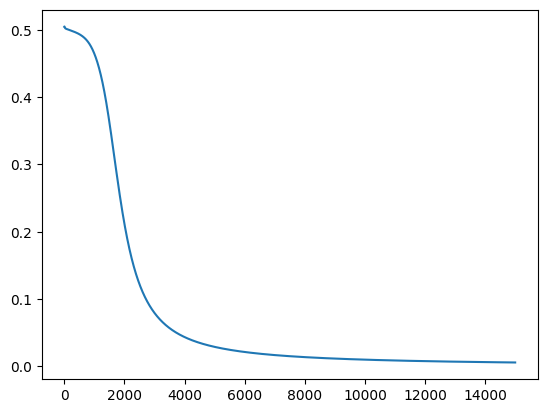

In [36]:
plt.plot(costs)
plt.show()